<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 84.0 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
print('Missing values in employment:', df['Employment'].isna().sum())
print('Missing values in JobSat:', df['JobSat'].isna().sum())
print('Missing values in RemoteWork:', df['RemoteWork'].isna().sum())

median = df['JobSat'].median()
df['JobSat'] = df['JobSat'].fillna(median)
print('Updated missing values in JobSat:', df['JobSat'].isna().sum())

most_freq = df['RemoteWork'].value_counts().idxmax()
df['RemoteWork'] = df['RemoteWork'].fillna(most_freq)
print('Updated missing values in RemoteWork:', df['RemoteWork'].isna().sum())






Missing values in employment: 0
Missing values in JobSat: 36311
Missing values in RemoteWork: 10631
Updated missing values in JobSat: 0
Updated missing values in RemoteWork: 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [12]:
print('Missing values in YearsCodePro:', df['YearsCodePro'].isna().sum())
most_freq_Years = df['YearsCodePro'].value_counts().idxmax()
df['YearsCodePro'] = df['YearsCodePro'].fillna(most_freq_Years)
print('Updated missing values in YearsCodePro:', df['YearsCodePro'].isna().sum())

Missing values in YearsCodePro: 13827
Updated missing values in YearsCodePro: 0


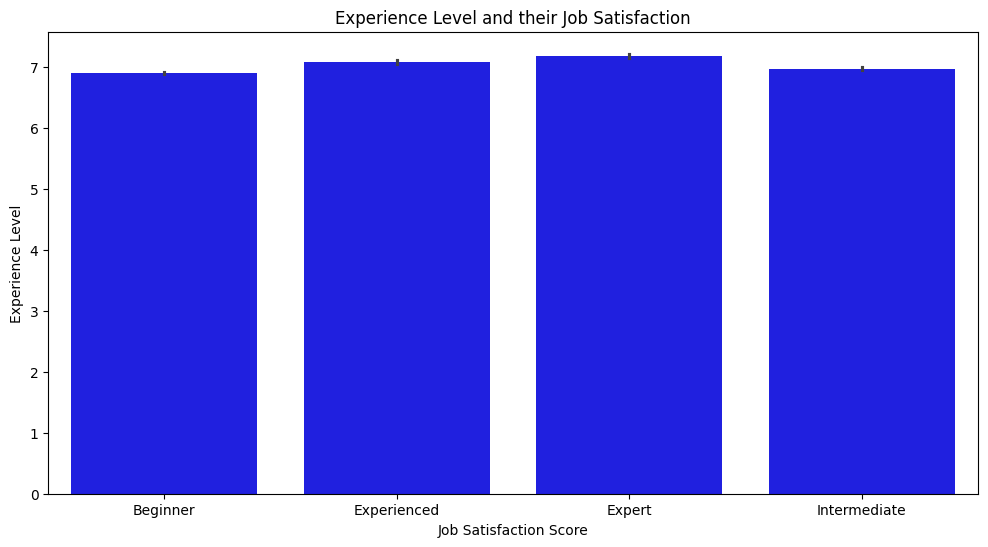

Experience_Ranges
Beginner        7.0
Experienced     7.0
Expert          7.0
Intermediate    7.0
Name: JobSat, dtype: float64


In [18]:
def experience(years):
    try:
        if years == 'Less than 1 year':
            return 'Beginner'
        if years == 'More than 50 years':
            return 'Expert'
        else:        
            years = float(years)
            
        if years <= 5:
            return 'Beginner'
        elif years > 5 and years <= 10:
            return "Intermediate"
        elif years > 10 and years <= 20:
            return "Experienced"
        elif years > 20:
            return "Expert"
    except:
        return "Unknown"


df['Experience_Ranges'] = df['YearsCodePro'].apply(experience)

median_job = df.groupby('Experience_Ranges')['JobSat'].median()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Experience_Ranges", y='JobSat',color='blue')
plt.title('Experience Level and their Job Satisfaction')
plt.ylabel('Experience Level')
plt.xlabel('Job Satisfaction Score')
plt.show()

print(median_job)


    
    

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


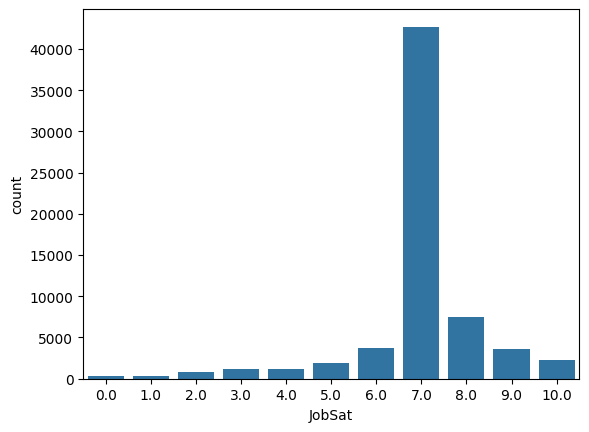

In [20]:
sns.countplot(data=df, x='JobSat')
plt.title('Job Satitisfaction Scores')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


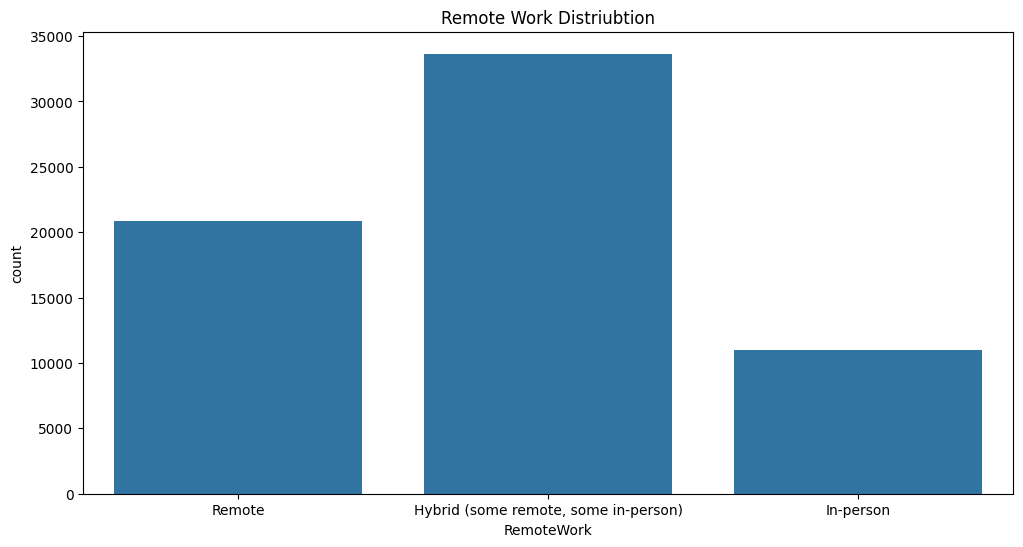

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='RemoteWork')
plt.title('Remote Work Distriubtion')
plt.show()

In [30]:
pd.crosstab(index=[df['Employment'], df['RemoteWork']], columns=df['DevType'])

DevType                                                                       Academic researcher  \
Employment                              RemoteWork                                                  
Employed, full-time                     Hybrid (some remote, some in-person)                  324   
                                        In-person                                             209   
                                        Remote                                                 43   
Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)                    1   
                                        In-person                                               1   
...                                                                                           ...   
Student, part-time                      Hybrid (some remote, some in-person)                   10   
Student, part-time;Employed, part-time  Hybrid (some remote, some in-person)                   20   
                                        In-person                                               5   
                                        Remote                                                  2   
Student, part-time;Retired              Hybrid (some remote, some in-person)                    0   

DevType                                                                       Blockchain  \
Employment                              RemoteWork                                         
Employed, full-time                     Hybrid (some remote, some in-person)          17   
                                        In-person                                     14   
                                        Remote                                        66   
Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)           0   
                                        In-person                                      0   
...                                                                                  ...   
Student, part-time                      Hybrid (some remote, some in-person)           3   
Student, part-time;Employed, part-time  Hybrid (some remote, some in-person)           0   
                                        In-person                                      0   
                                        Remote                                         0   
Student, part-time;Retired              Hybrid (some remote, some in-person)           0   

DevType                                                                       Cloud infrastructure engineer  \
Employment                              RemoteWork                                                            
Employed, full-time                     Hybrid (some remote, some in-person)                            220   
                                        In-person                                                        42   
                                        Remote                                                          216   
Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)                              1   
                                        In-person                                                         0   
...                                                                                                     ...   
Student, part-time                      Hybrid (some remote, some in-person)                              3   
Student, part-time;Employed, part-time  Hybrid (some remote, some in-person)                              1   
                                        In-person                                                         2   
                                        Remote                                                            1   
Student, part-time;Retired              Hybrid (some remote, some in-person)                              0   

DevType                                      

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


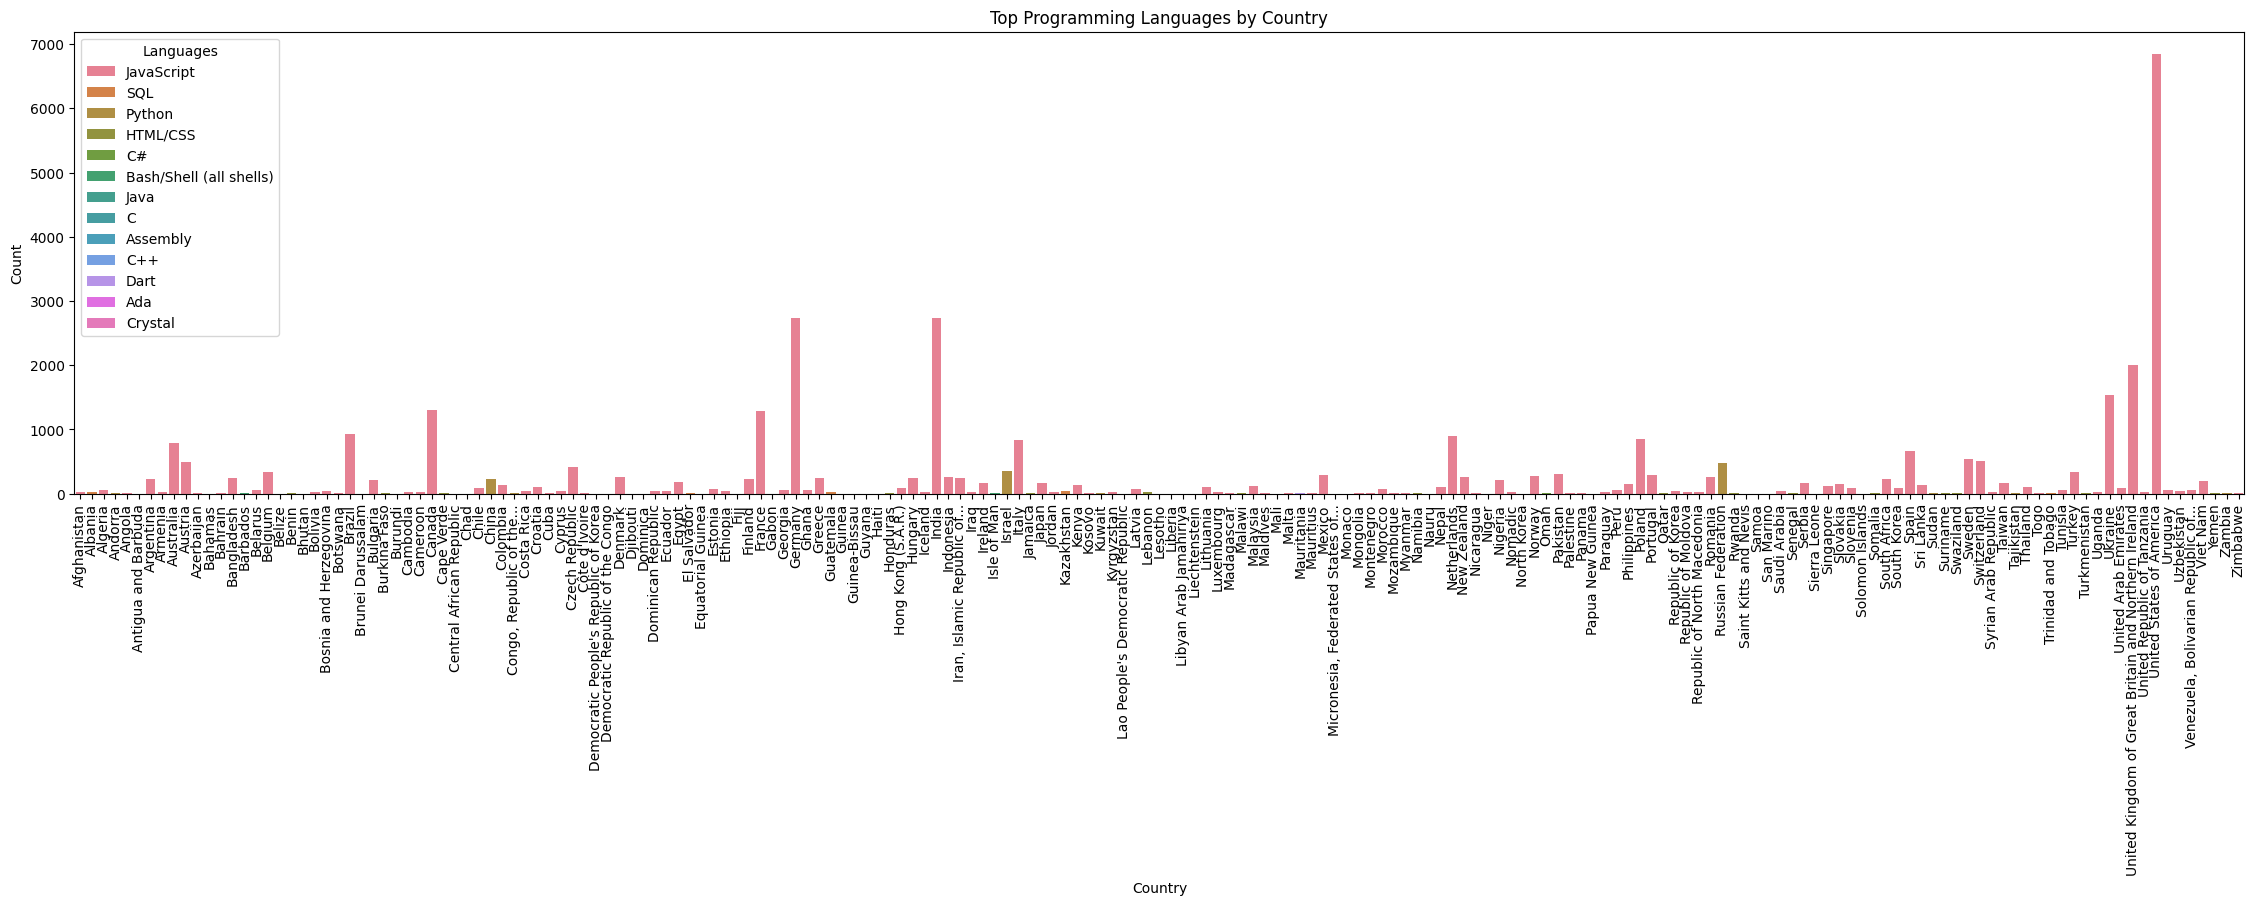

Text(220.72222222222223, 0.5, 'Programming Language')

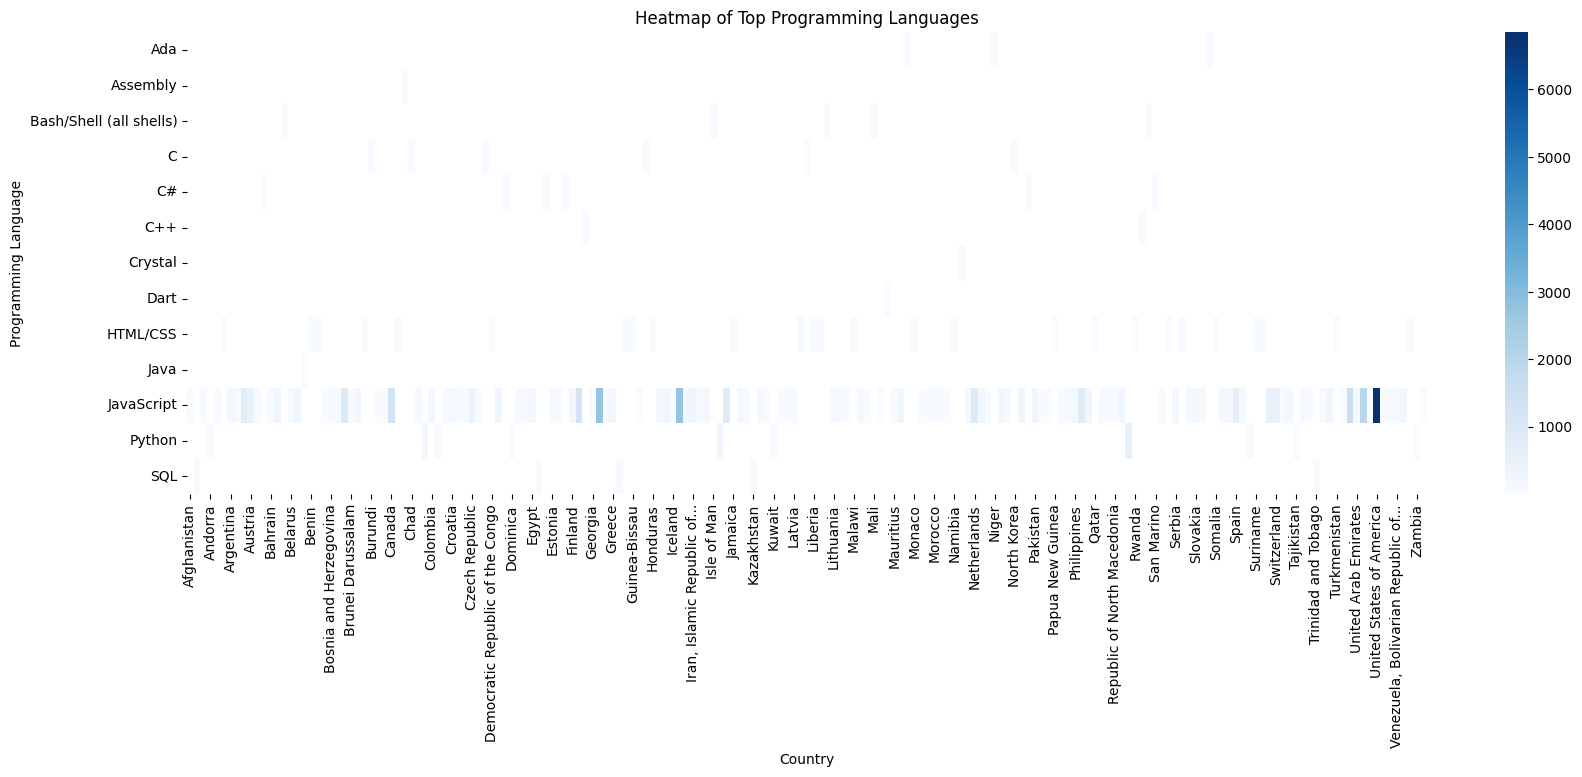

In [111]:
df = df.dropna(subset=['LanguageHaveWorkedWith'])
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('Languages')
df_exploded['Languages'] = df_exploded['Languages'].str.strip()

lang_counts = df_exploded.groupby('Country')['Languages'].value_counts().reset_index()
top_lang = lang_counts.sort_values(['Country', 'count'], ascending=[True,False]).drop_duplicates(subset=['Country'])

plt.figure(figsize=(28,6))
sns.barplot(data=top_lang, x='Country', y='count', hue='Languages')
plt.title('Top Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.show()

heatmap = top_lang.pivot(index='Languages', columns='Country', values='count')

plt.figure(figsize=(20,6))
sns.heatmap(data=heatmap, cmap='Blues')
plt.title('Heatmap of Top Programming Languages')
plt.xlabel('Country')
plt.ylabel('Programming Language')

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


/tmp/ipykernel_301/1991830016.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_301/1991830016.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_301/1991830016.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



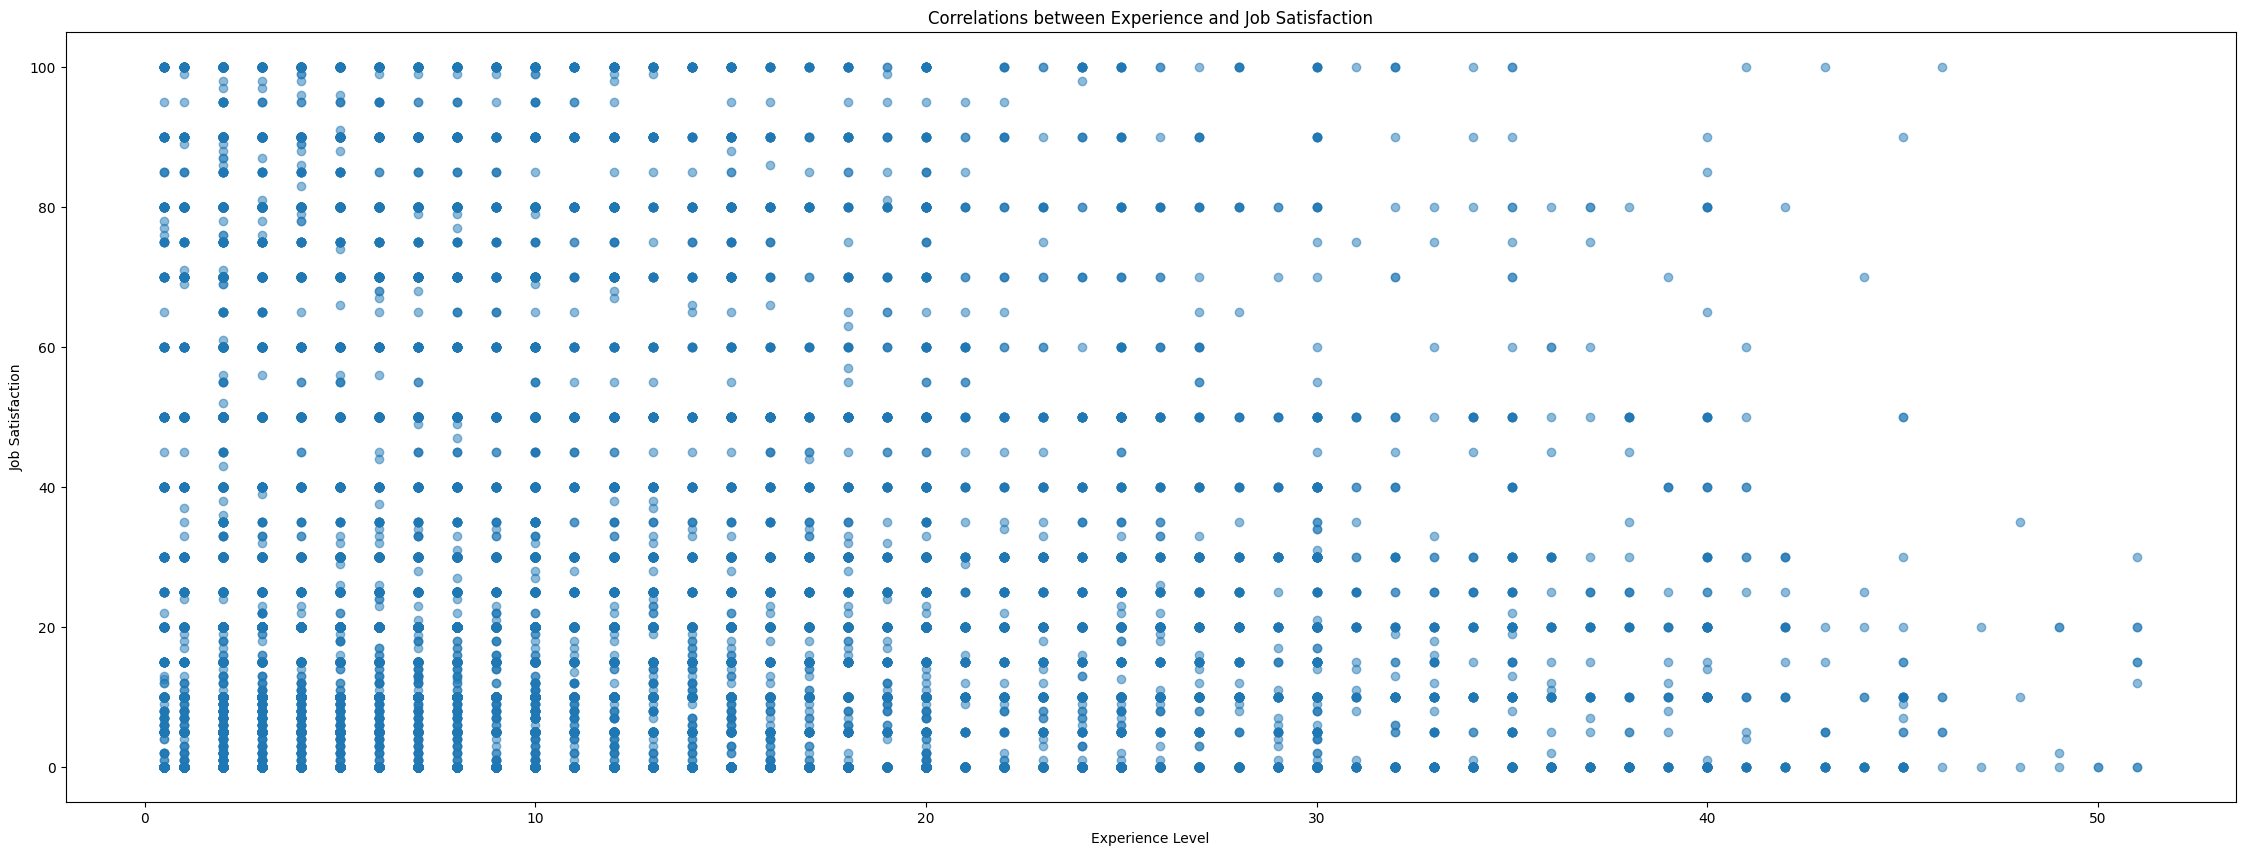

In [141]:
df_scatter = df[['YearsCodePro','JobSatPoints_1']]
df_scatter['JobSatPoints_1'].dropna(inplace=True)
df_scatter['YearsCodePro'] = df_scatter['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51})
df_scatter['YearsCodePro'] = df_scatter['YearsCodePro'].astype(float)
df_scatter = df_scatter.sort_values(by='YearsCodePro', ascending=True)

plt.figure(figsize=(28,10))
plt.scatter(x=df_scatter['YearsCodePro'], y=df_scatter['JobSatPoints_1'], alpha=0.5)
plt.title('Correlations between Experience and Job Satisfaction')
plt.ylabel('Job Satisfaction')
plt.xlabel('Experience Level')

plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


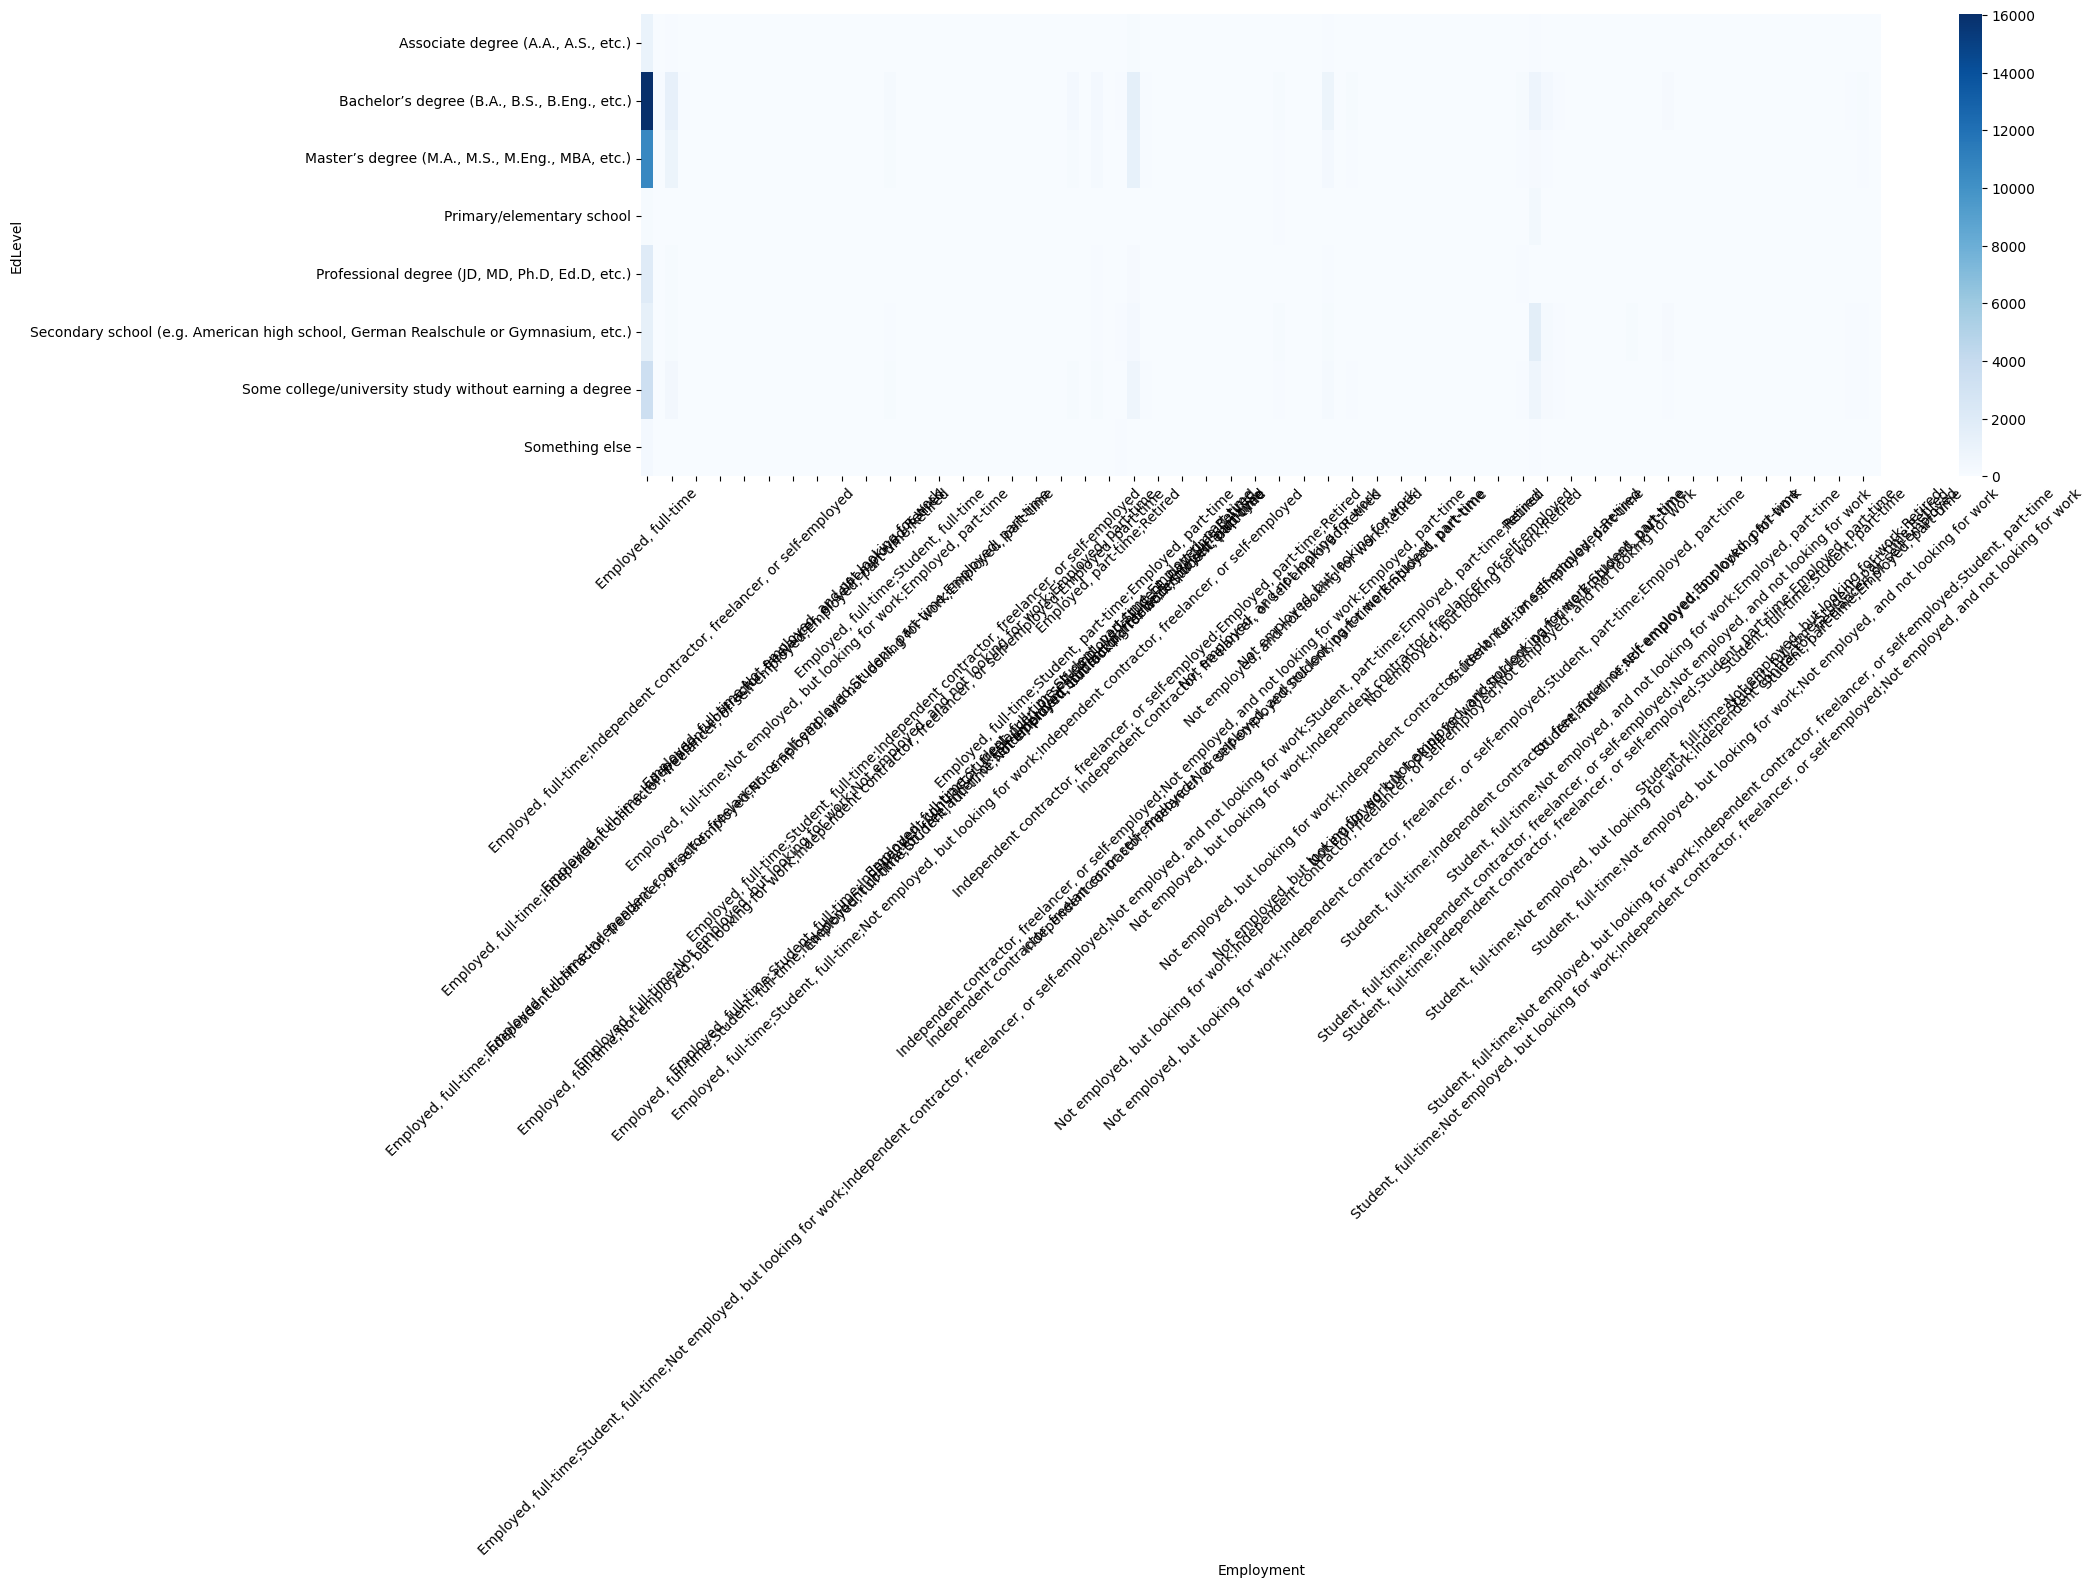

In [159]:
df = df.dropna(subset='Employment')
CrossTab = pd.crosstab(index=df['EdLevel'], columns=df['Employment'])

plt.figure(figsize=(20,6))
sns.heatmap(CrossTab, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [167]:
!pip install openpyxl
from openpyxl import Workbook 

df.to_excel('surveyData.xlsx', index=False)



<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
